**Import the necessary Libraries-**

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**Load the dataset into Pandas Dataframe and display first few rows**

In [31]:
df = pd.read_excel("C:/Users/sbose/OneDrive/Desktop/Online Retail Data Analysis/Online Retail.xlsx")
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Data Cleaning

**Check for missing value-**

In [32]:
df.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Drop rows with missing values in key columns**

In [33]:
df = df.dropna(subset=['CustomerID', 'Description'])


**Remove Duplicate and Unnecessary Columns**

In [34]:
df = df.drop_duplicates()


# Basic Statistics and Overview

**Describe the Data:**

In [35]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,401604.000000,401604,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064,15281.160818
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,250.283037,NaN,69.764035,1714.006089


**Understand Categorical Columns:**

In [37]:
df['Country'].value_counts

<bound method IndexOpsMixin.value_counts of 0         United Kingdom
1         United Kingdom
2         United Kingdom
3         United Kingdom
4         United Kingdom
               ...      
541904            France
541905            France
541906            France
541907            France
541908            France
Name: Country, Length: 401604, dtype: object>

In [38]:
df['StockCode'].value_counts

<bound method IndexOpsMixin.value_counts of 0         85123A
1          71053
2         84406B
3         84029G
4         84029E
           ...  
541904     22613
541905     22899
541906     23254
541907     23255
541908     22138
Name: StockCode, Length: 401604, dtype: object>

# Exploratory Data Analysis (EDA) with Visualizations

**Create a new column, TotalPrice, by multiplying Quantity by UnitPrice.**

In [39]:
df['TotalPrice']= df['Quantity']*df['UnitPrice']

**Extract month and day of the week from the InvoiceDate.**

In [40]:
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


**Plot total sales by month and day of the week.**

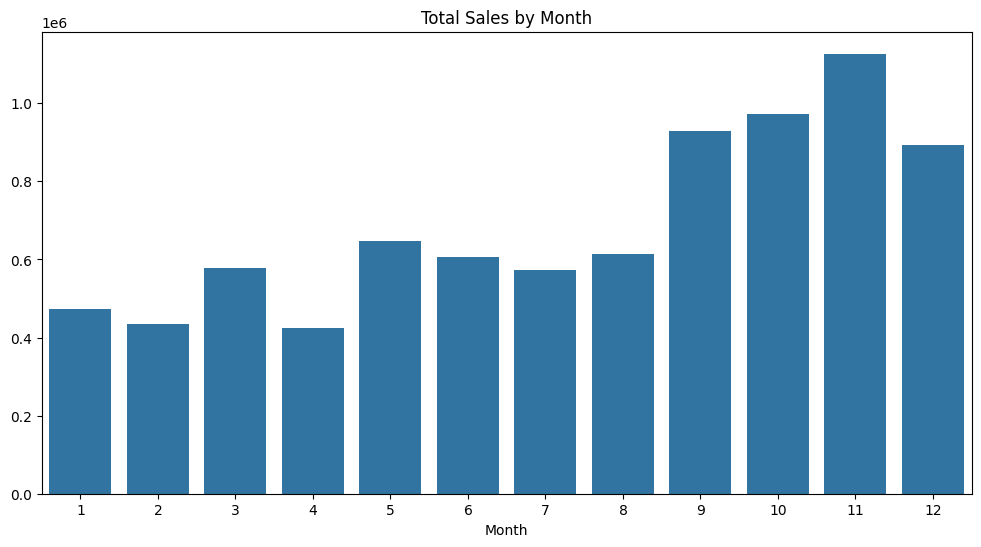

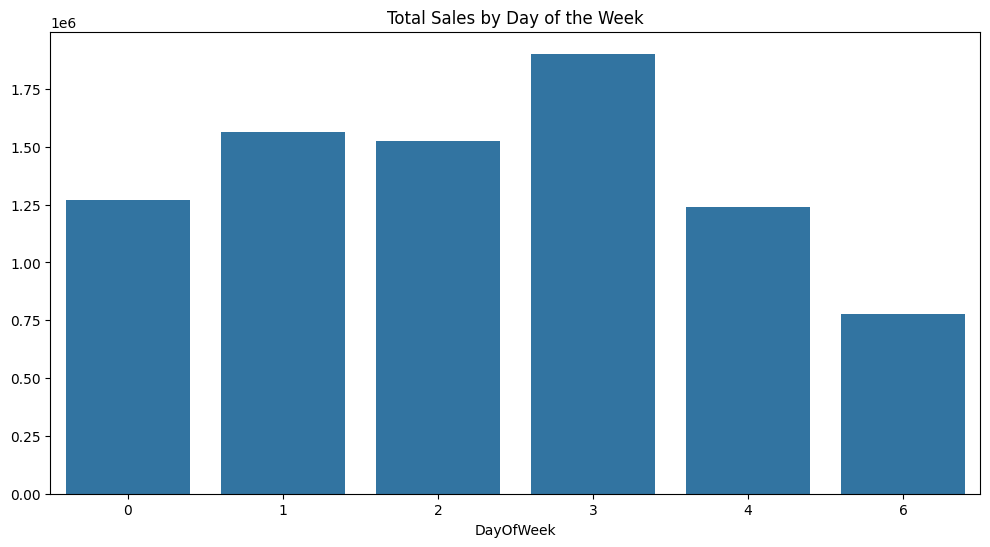

In [41]:
monthly_sales = df.groupby('Month')['TotalPrice'].sum()
weekly_sales = df.groupby('DayOfWeek')['TotalPrice'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title("Total Sales by Month")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=weekly_sales.index, y=weekly_sales.values)
plt.title("Total Sales by Day of the Week")
plt.show()


**Top selling products and Countries
Calculate total quantity sold per product and per country.**

In [42]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_countries = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)


**Visualize top selling products and countries**

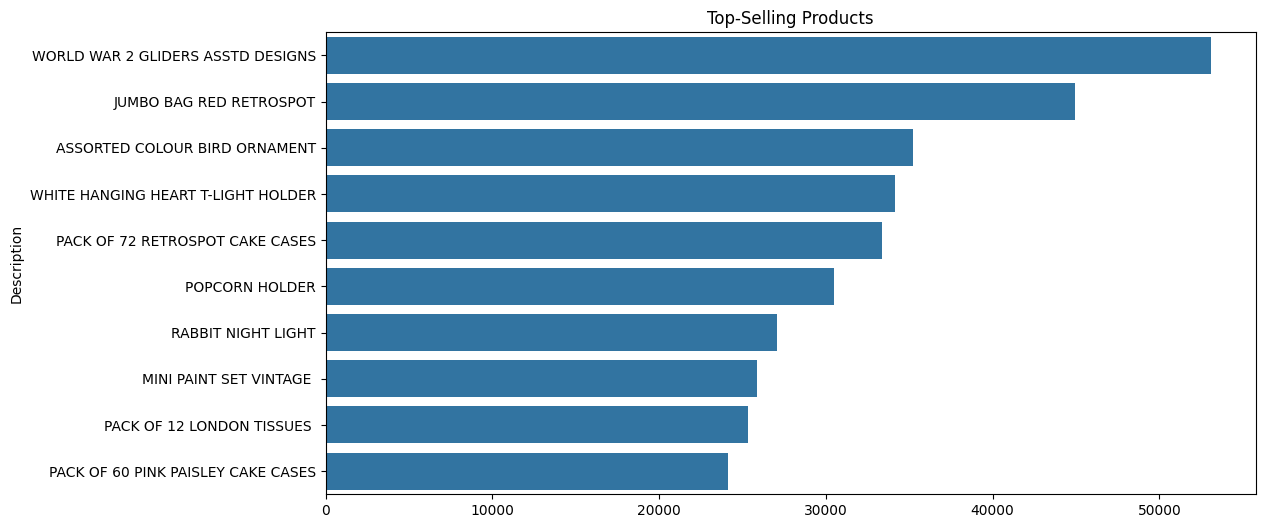

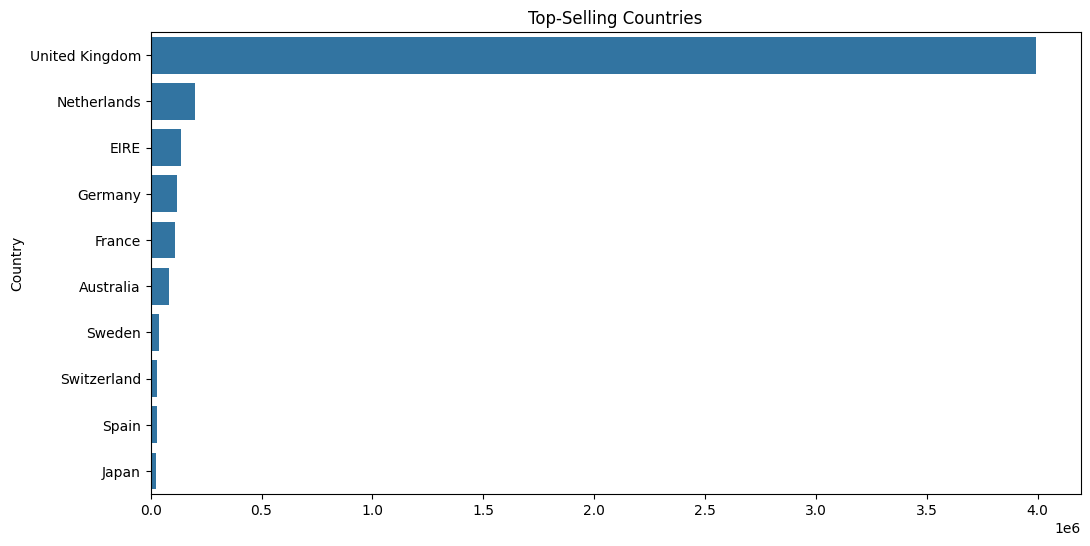

In [43]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top-Selling Products")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top-Selling Countries")
plt.show()


**Calculate total quantity sold per product and per country.**

In [44]:
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)


**Plot most valuable customers**

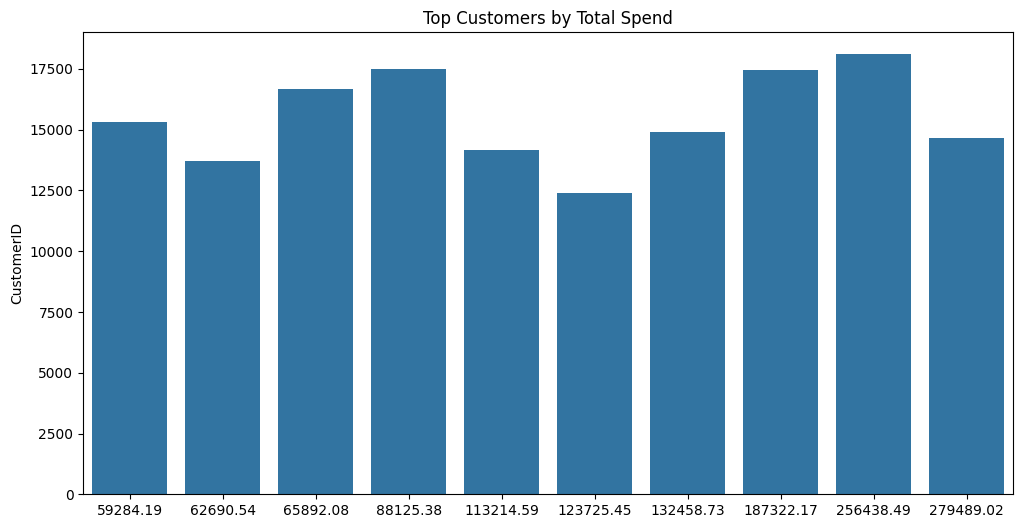

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_customers.values, y=top_customers.index)
plt.title("Top Customers by Total Spend")
plt.show()


**Identify Outliers and Anomalies
Analyze Quantity and Price: Look for unusually high quantities or prices that may indicate errors or special cases.**

<Axes: ylabel='Quantity'>

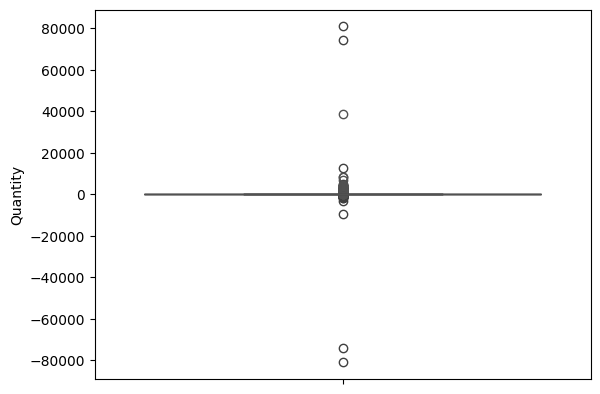

In [46]:
sns.boxplot(df['Quantity'])
sns.boxplot(df['UnitPrice'])
